<a href="https://colab.research.google.com/github/zhus-dika/cge_gamspy_project/blob/main/colab_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐘 Script evaluates the following steps:
- 🦉 clone git repository
- 🐄 install need packages via requirements.txt file
- 🐸 convert SAM table
- 🐙 aggregate SAM table to required dimesions
- 🐿️ execute calculations
- 🐛 plot results

## 🦉 Clone git repository

### 🦌 Cloning

In [ ]:
#! rm -r cge_gamspy_project

In [19]:
! git clone https://github.com/zhus-dika/cge_gamspy_project.git

Cloning into 'cge_gamspy_project'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 99 (delta 30), reused 94 (delta 27), pack-reused 0 (from 0)
Receiving objects: 100% (99/99), 1.75 MiB | 25.55 MiB/s, done.
Resolving deltas: 100% (30/30), done.


## 🐄 Install need packages via requirements.txt file


### 🐈 Installing

In [10]:
! dir

cge_gamspy_project  sample_data


In [20]:
! pip install -r cge_gamspy_project/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 67.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


## 🐸 Convert SAM table

### 🦏 Converting

In [1]:
! python cge_gamspy_project/convert_sam_types.py

## 🐙 Aggregate SAM table to required dimesions

### 🐧 Aggregating (reduce the number of industries)

In [2]:
! python cge_gamspy_project/aggregate.py

dict_keys(['Primary and Light Industry', 'Heavy Industry and Manufacturing', 'Utilities and Transport', 'Trade and Finance', 'Social and Professional Services'])
Balance is done for all elements.


## 🐿️ Execute calculations

### 🐝 Calculating

In [3]:
! python cge_gamspy_project/main_custom.py

                                   u         value
0                                CAP -8.847564e-09
1                                EXT  4.039612e-08
2                                GOV -8.731149e-10
3   Heavy Industry and Manufacturing -2.840534e-08
4                                INV  5.832408e-08
5                                LAB -2.095476e-09
6         Primary and Light Industry -3.096648e-08
7   Social and Professional Services -8.149073e-10
8                                 TC -1.862645e-09
9                                 TE  2.095476e-09
10                                TK -1.455192e-11
11                                TY -1.862645e-09
12                 Trade and Finance -6.111804e-09
13           Utilities and Transport -2.345769e-08
[MODEL - WARNING] The solve was interrupted! Solve status: TerminatedBySolver. For further information, see https://gamspy.readthedocs.io/en/latest/reference/gamspy._model.html#gamspy.SolveStatus.
[MODEL - WARNING] The solve was interr

## 🐛 Plot results

### 🐐 Visualizing

🦍 Imports

In [7]:
import os
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

🐆 Read data

<ipython-input-10-4ea0ef44b6c5>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


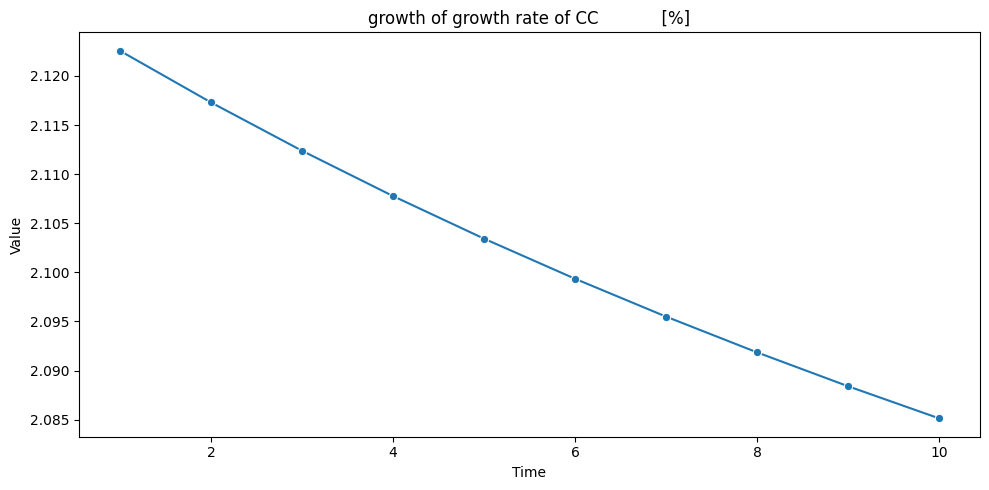

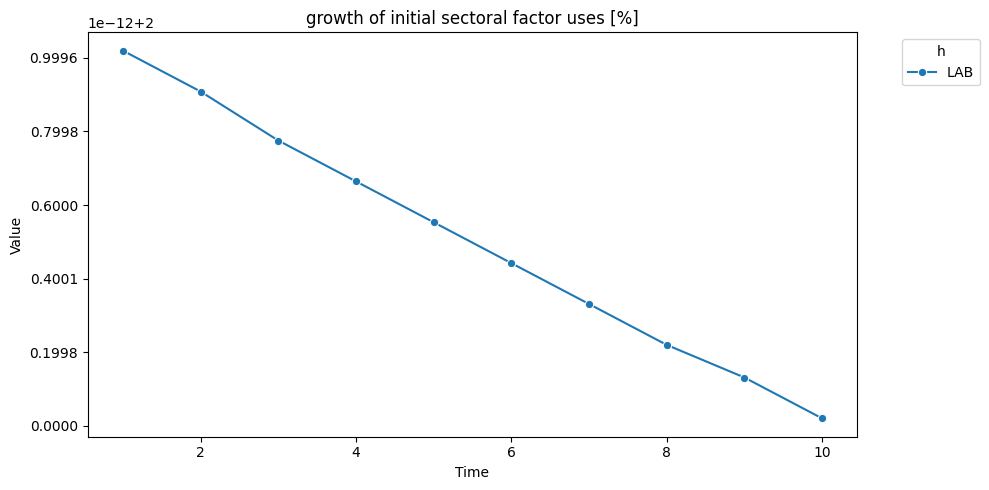

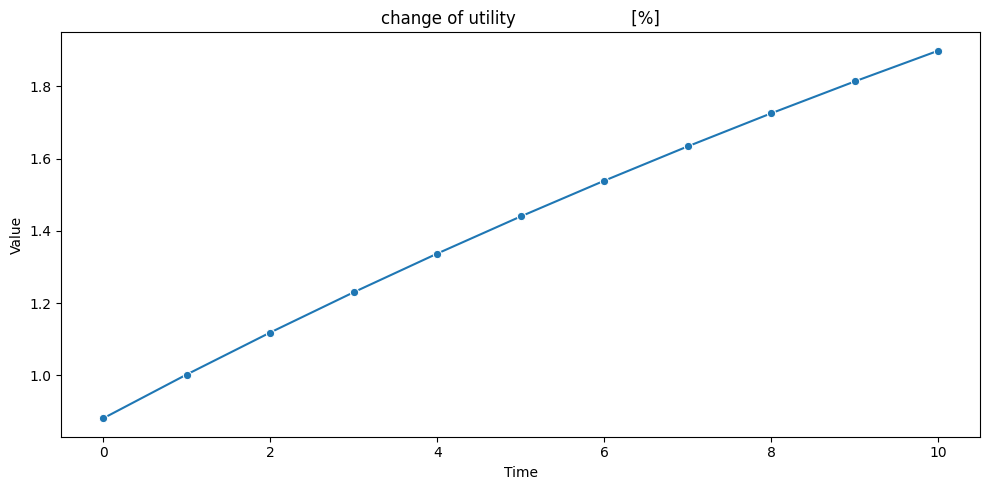

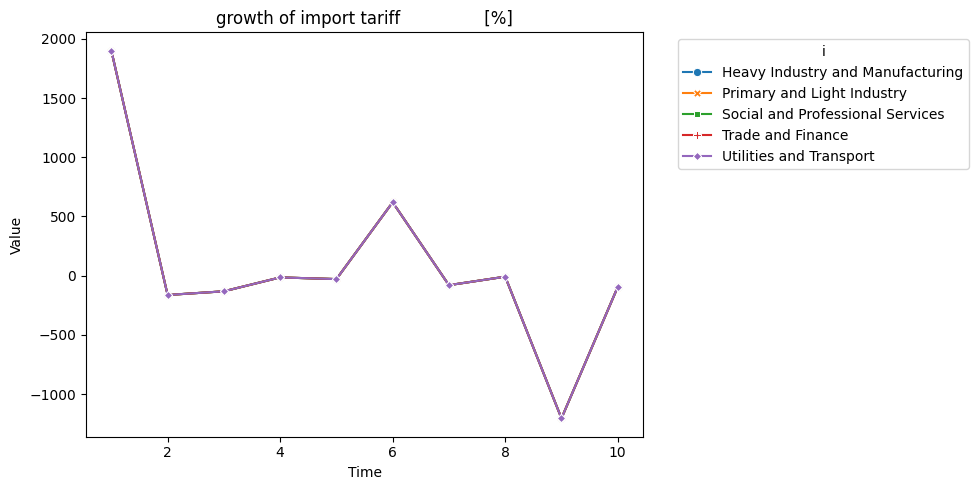

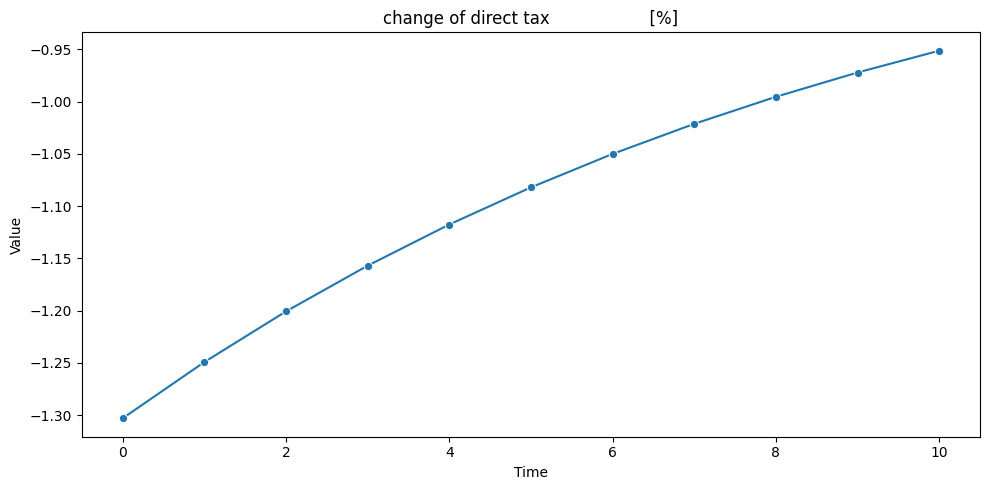

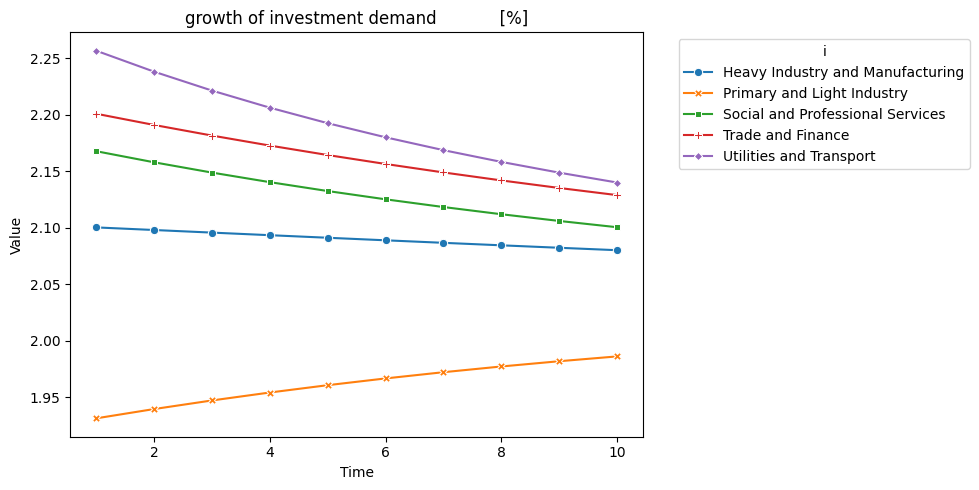

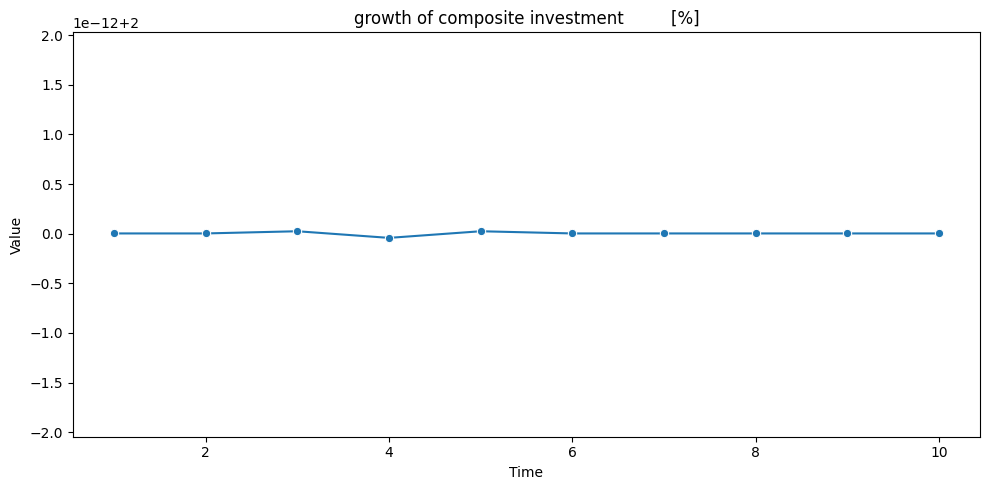

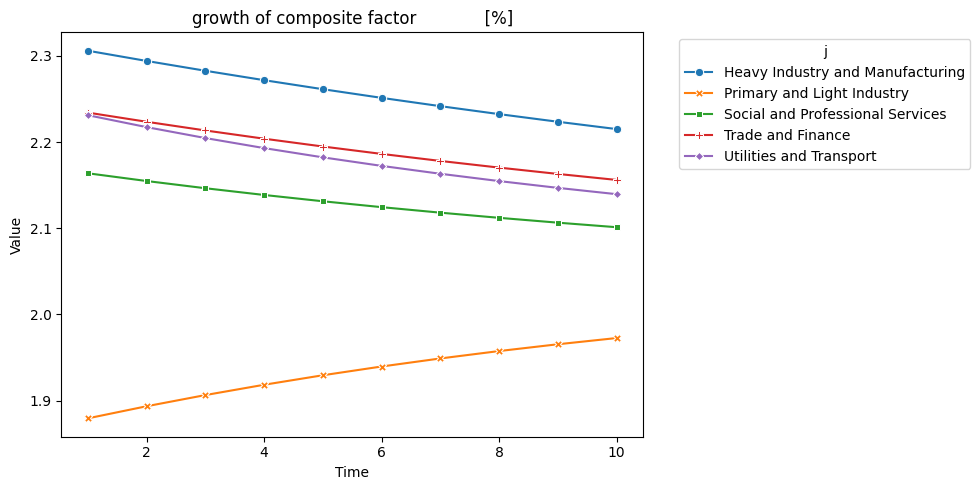

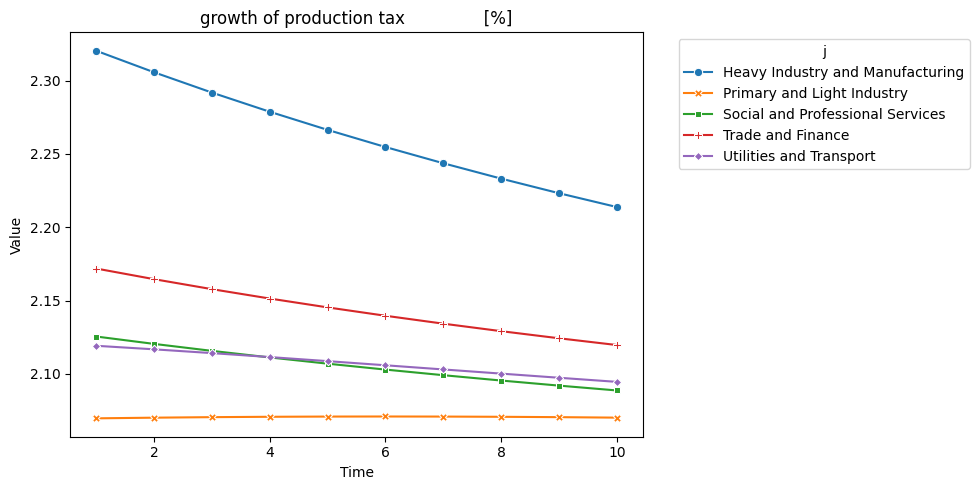

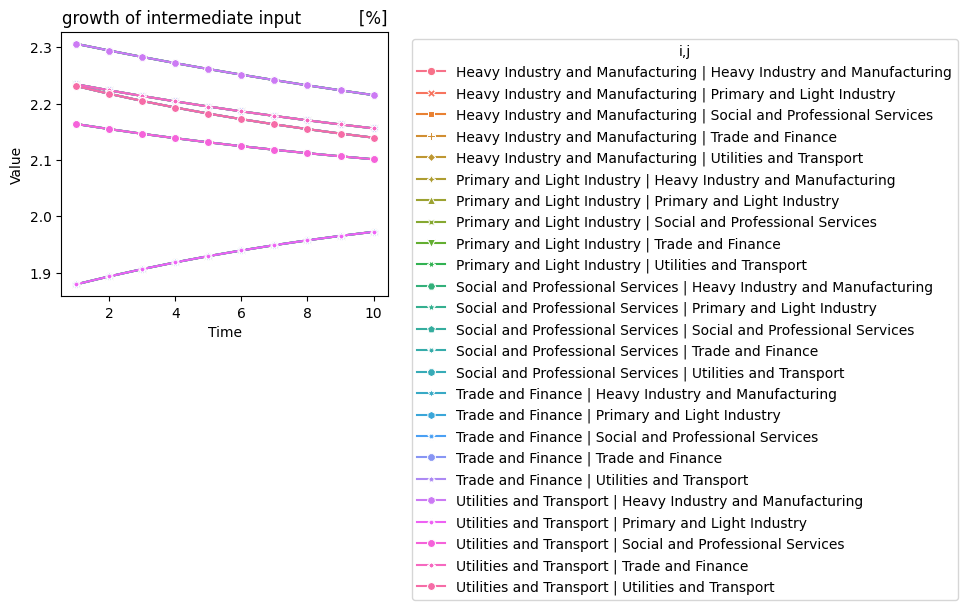

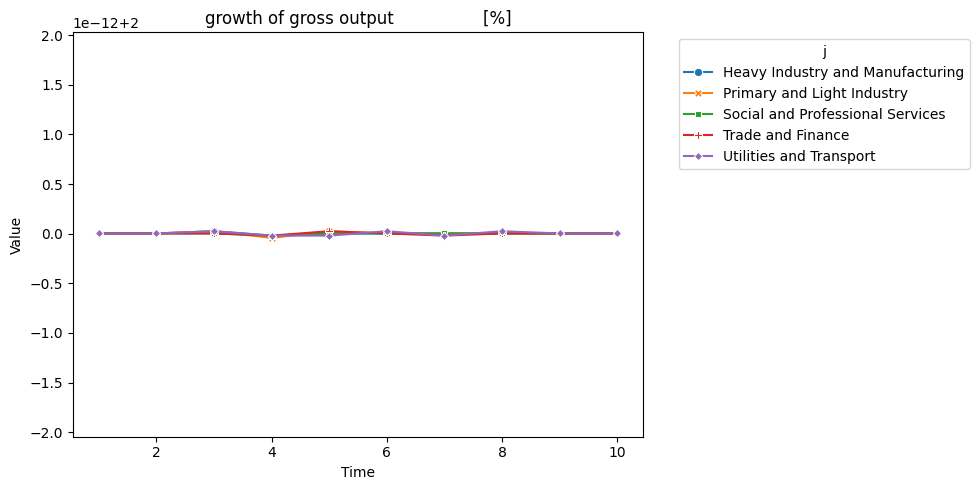

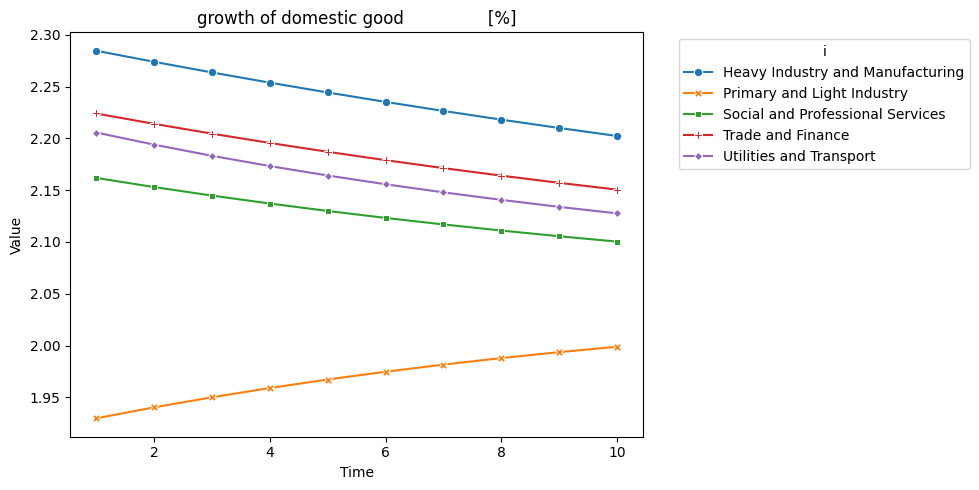

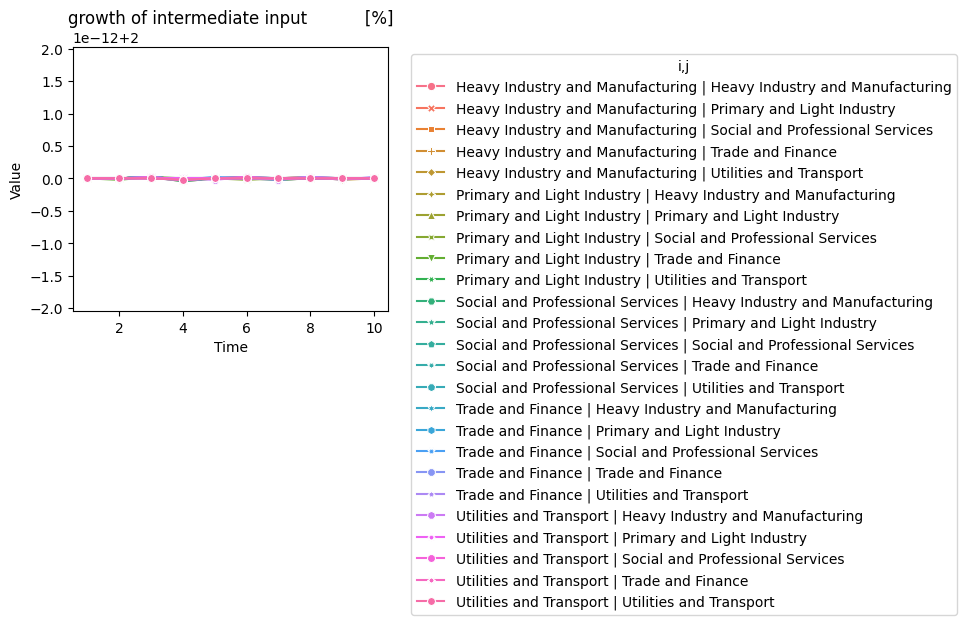

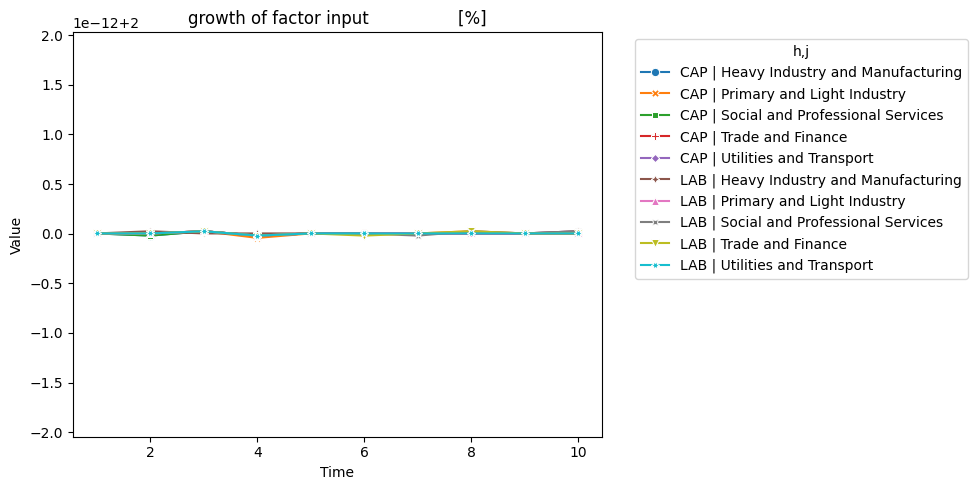

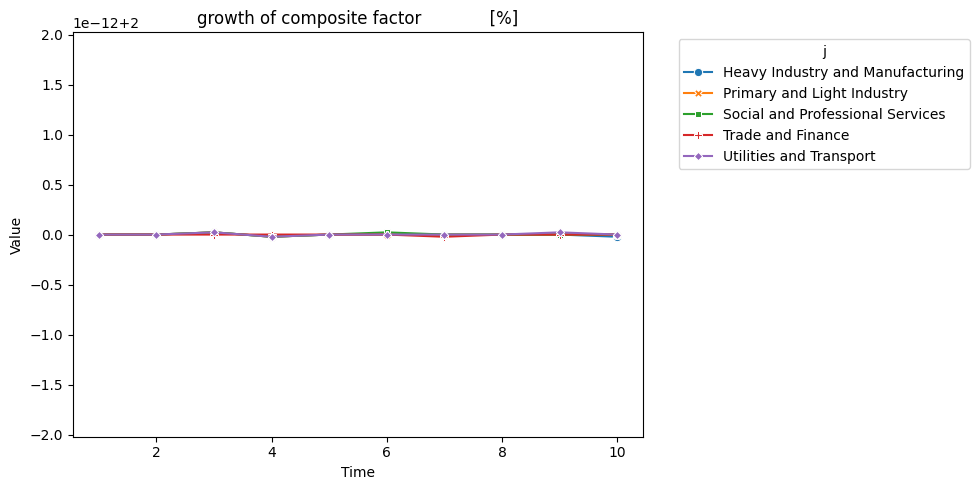

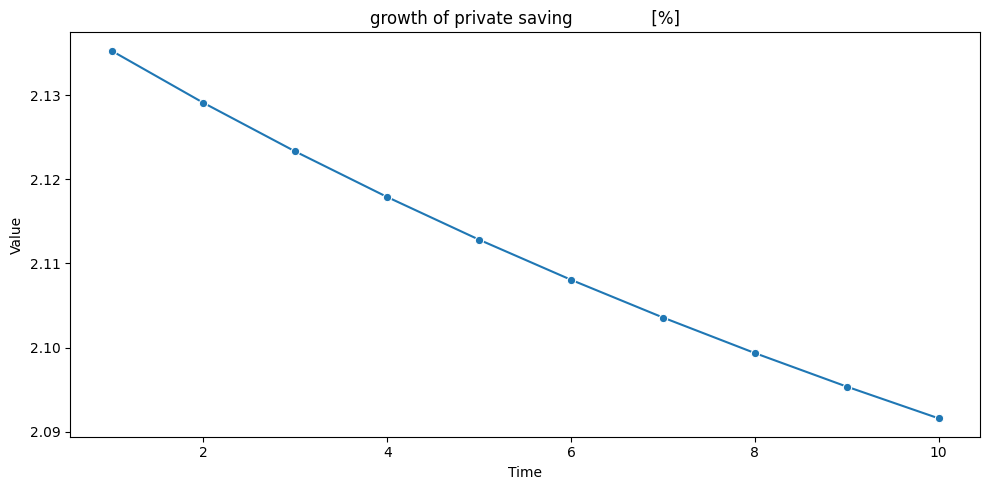

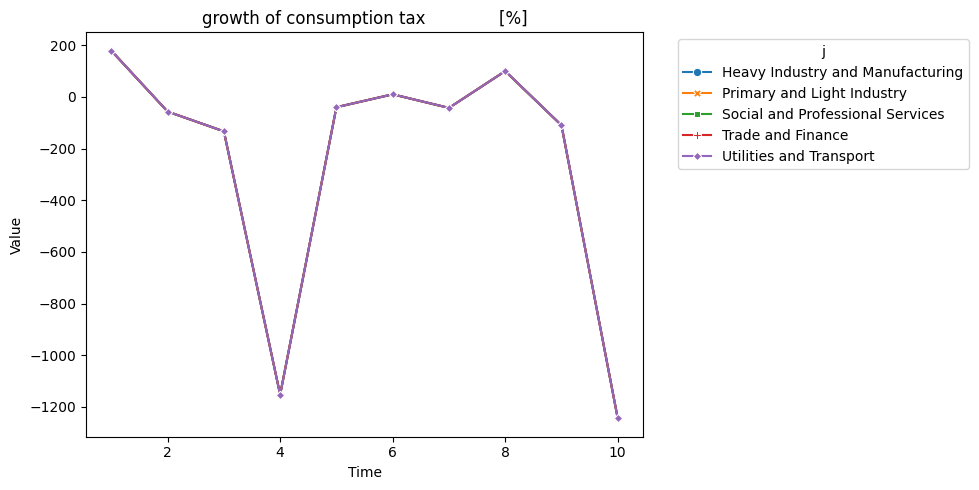

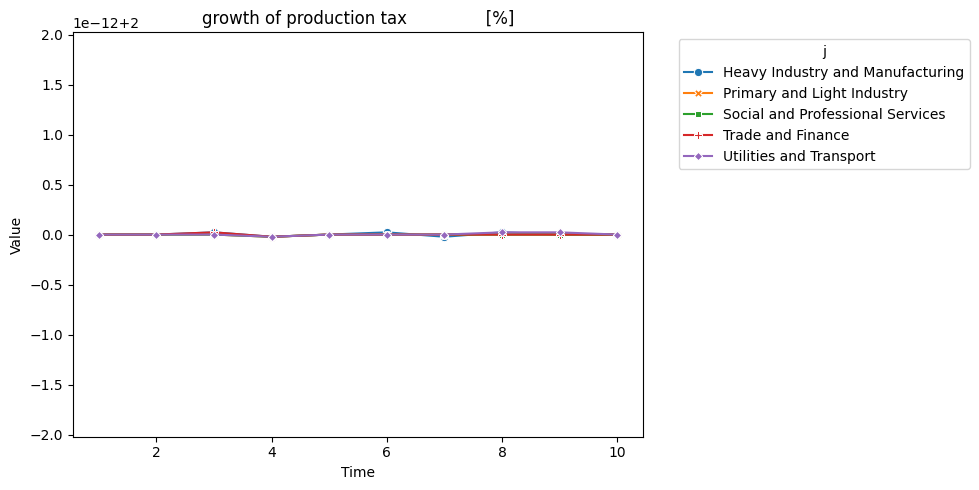

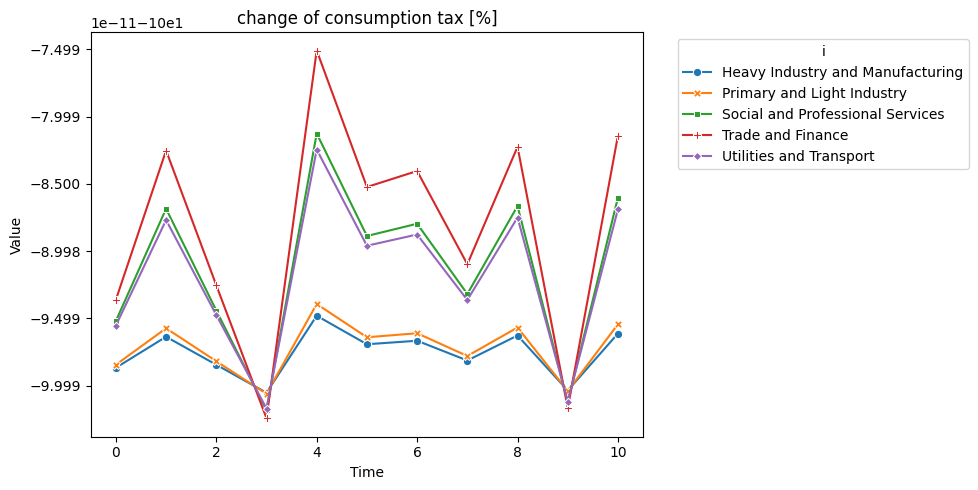

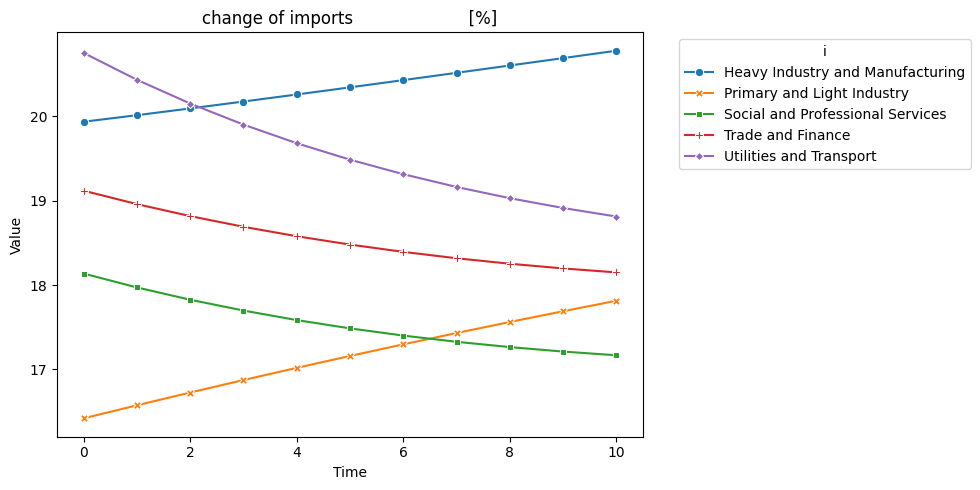

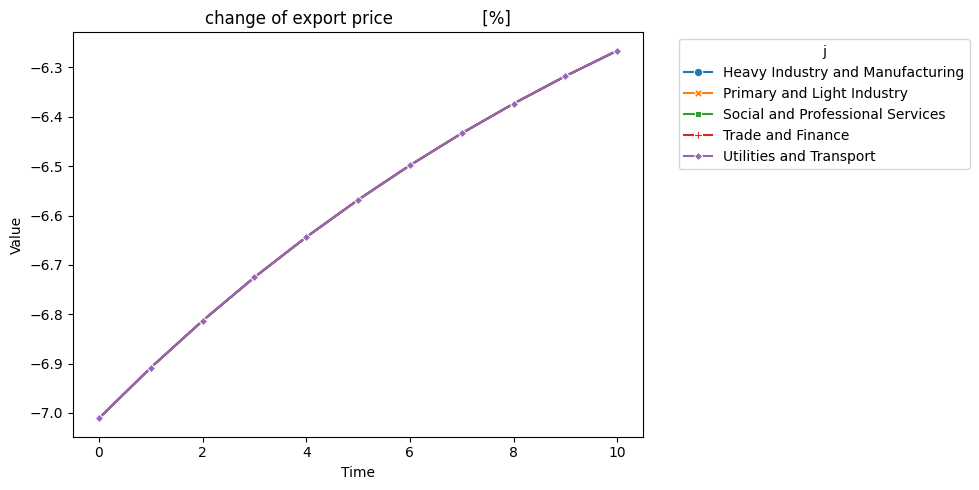

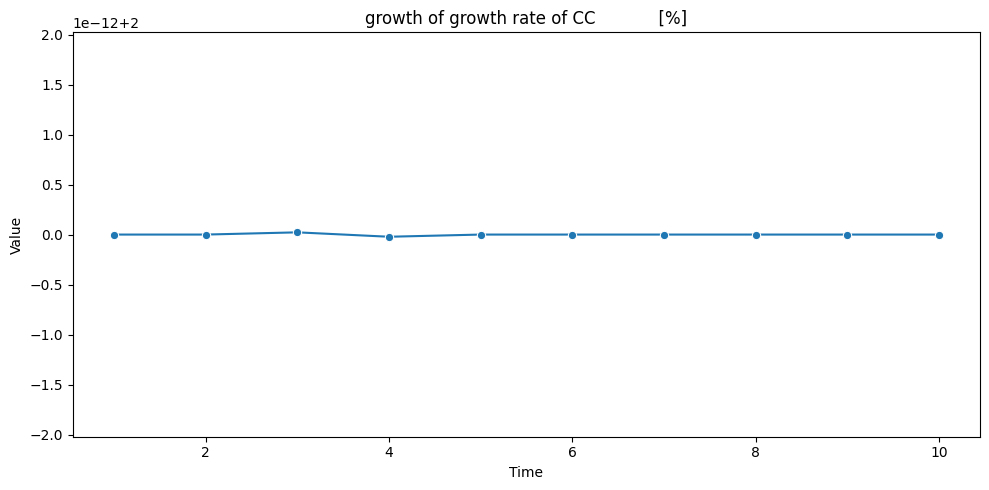

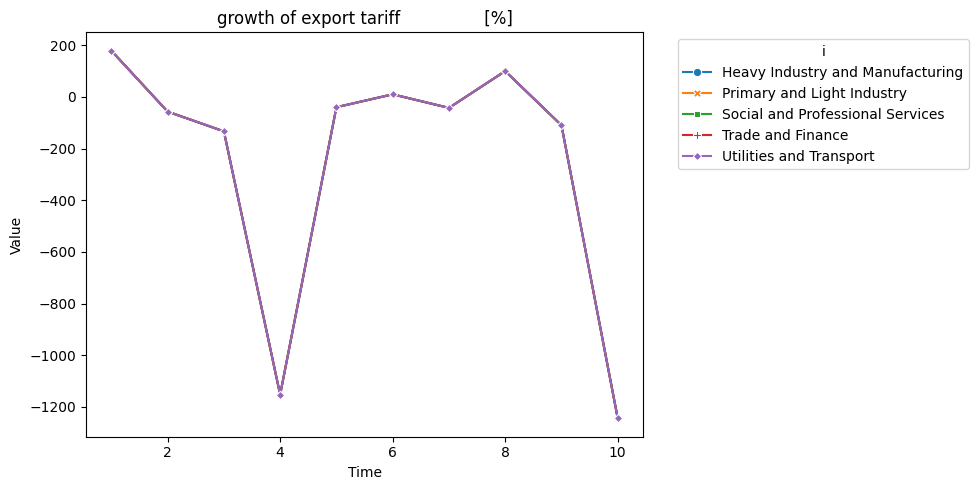

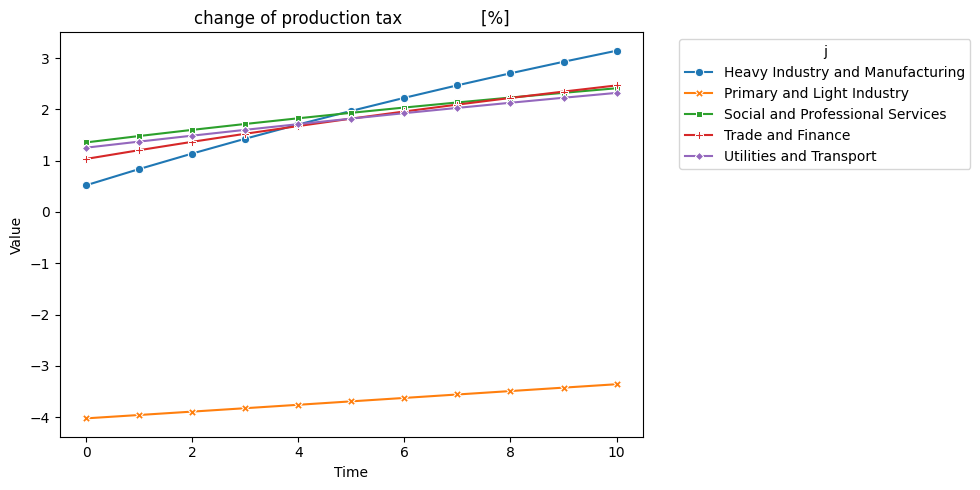

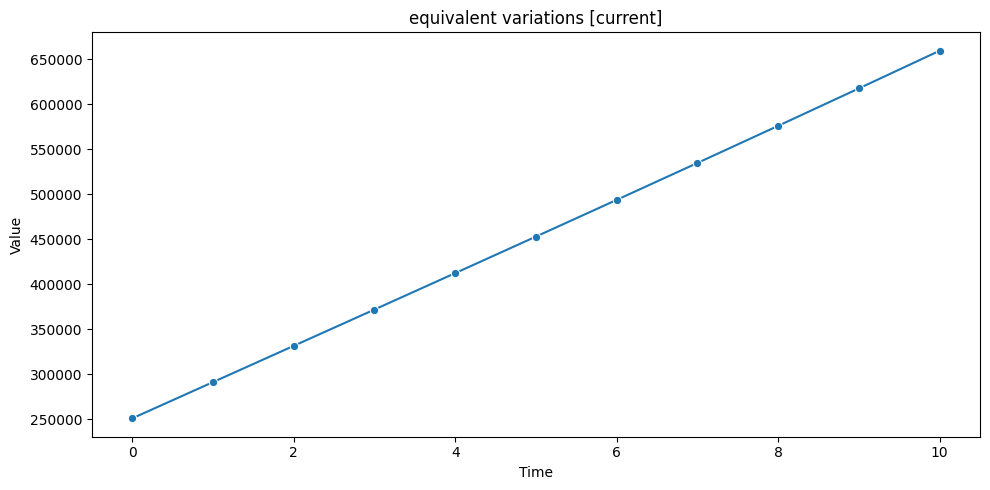

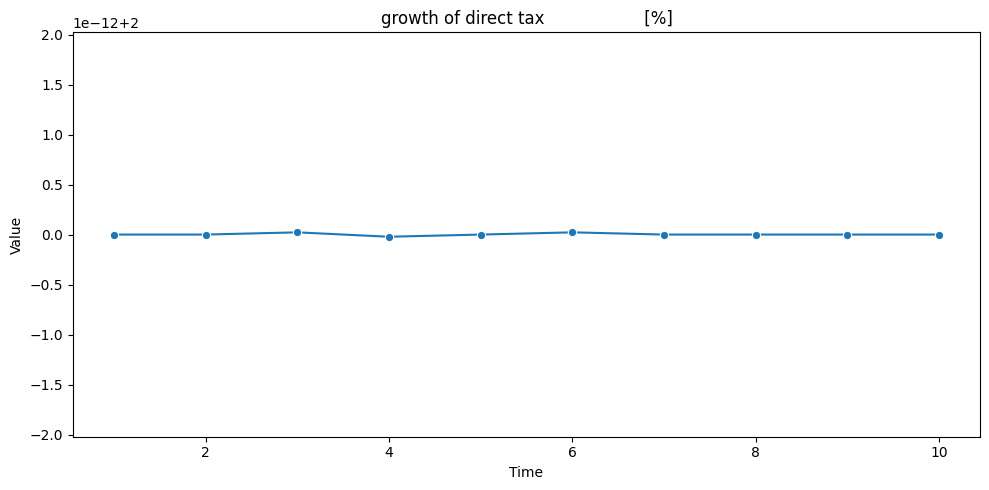

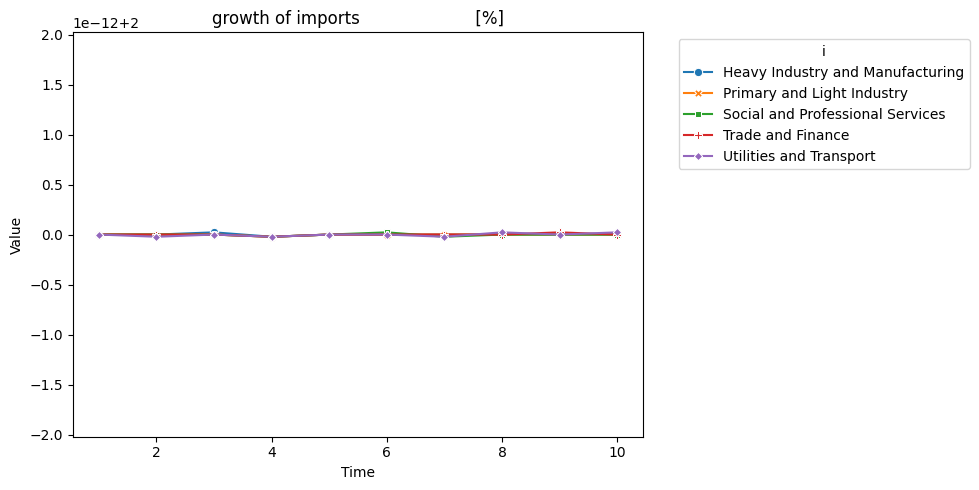

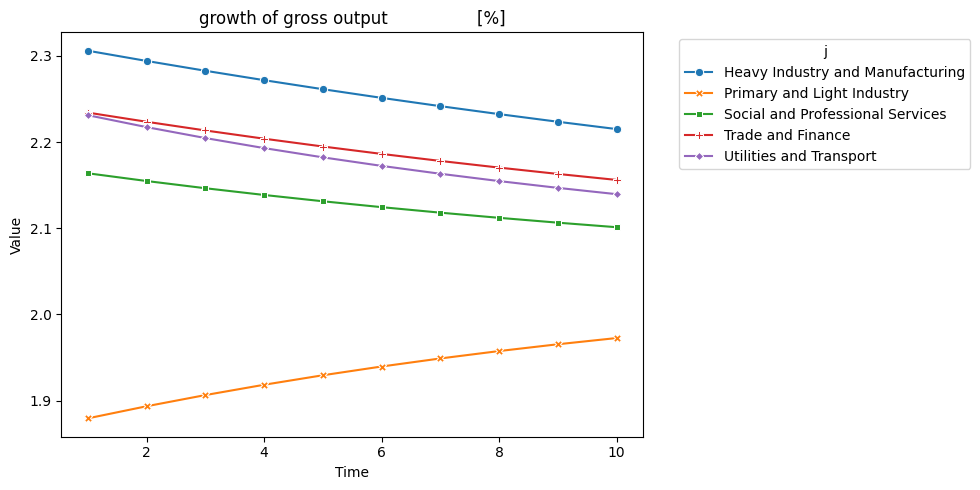

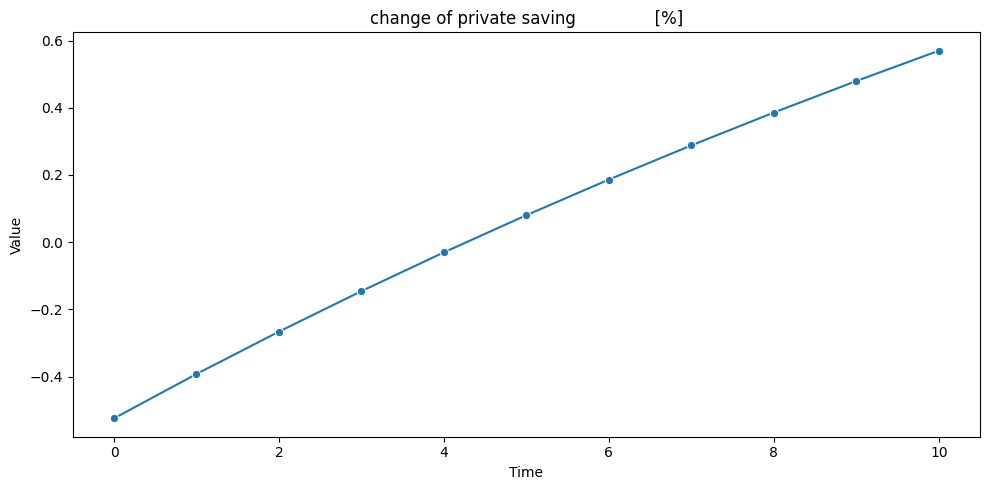

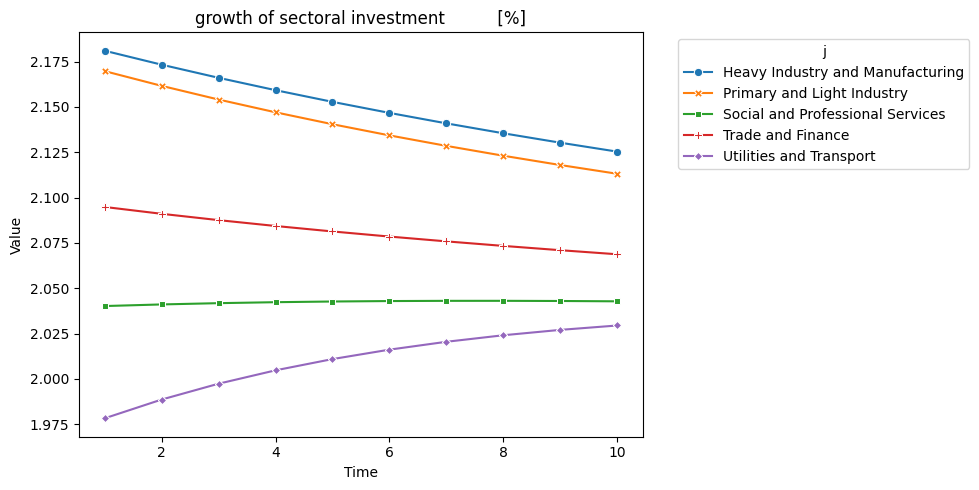

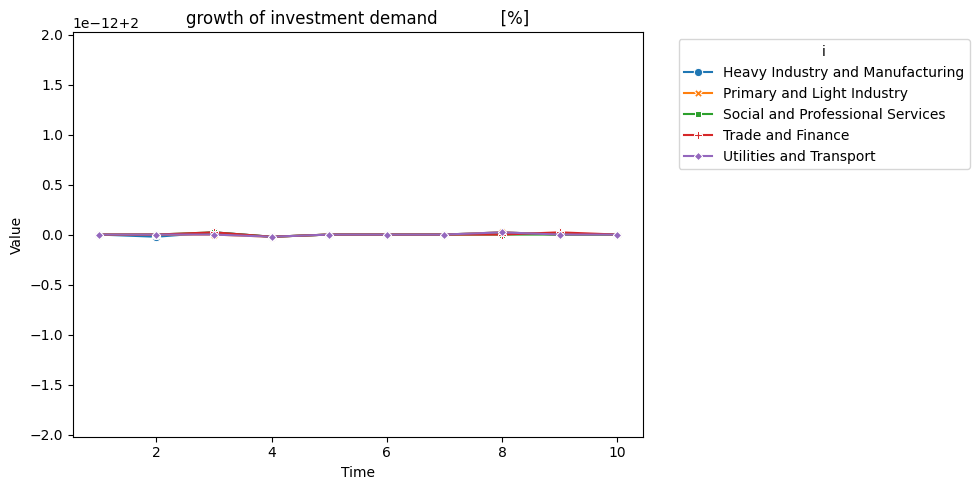

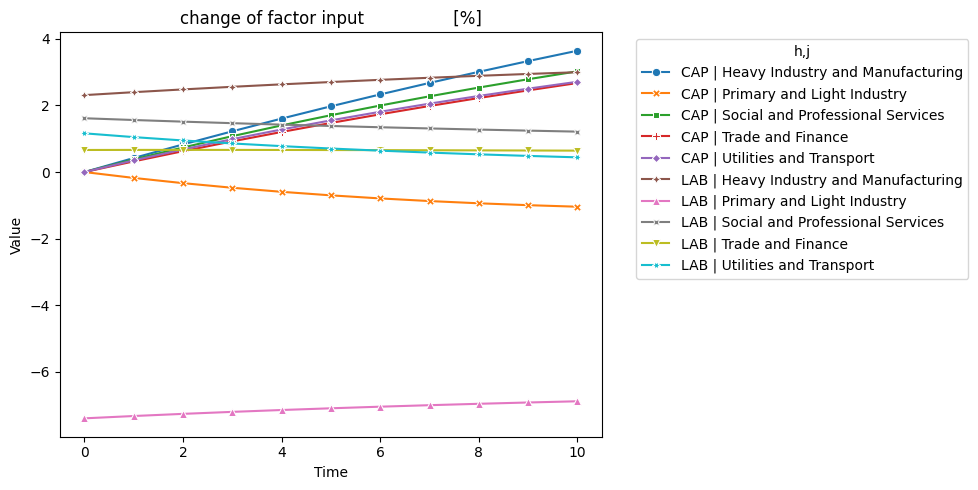

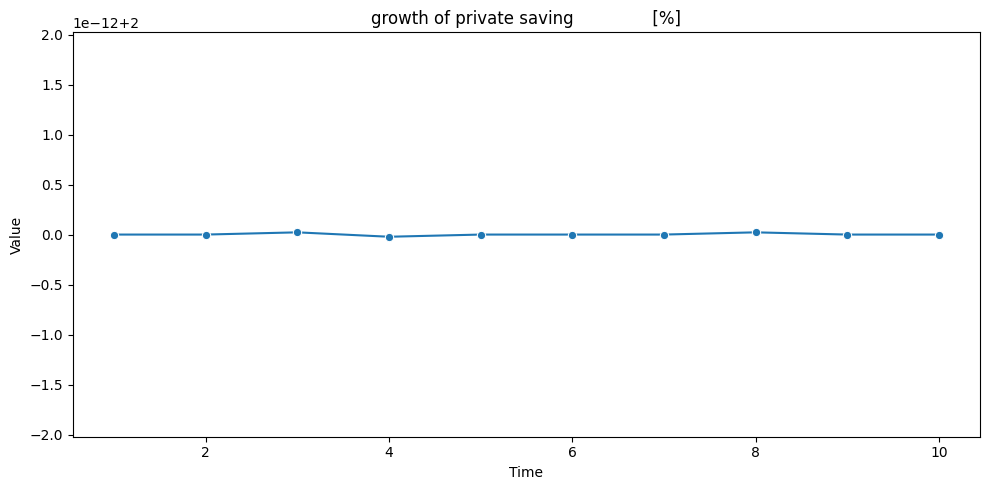

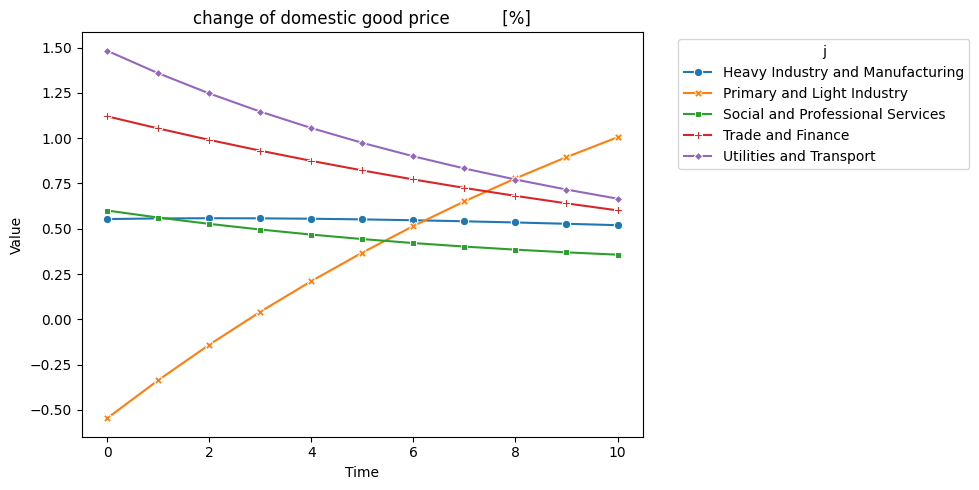

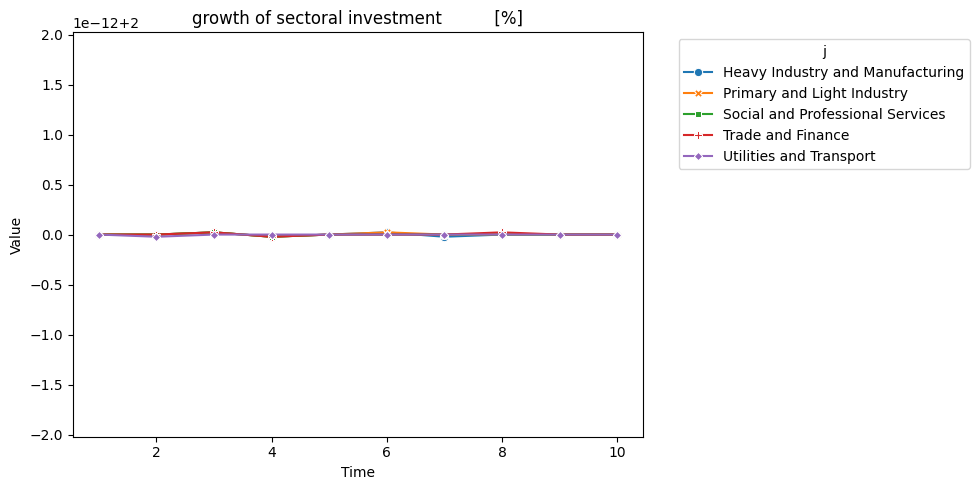

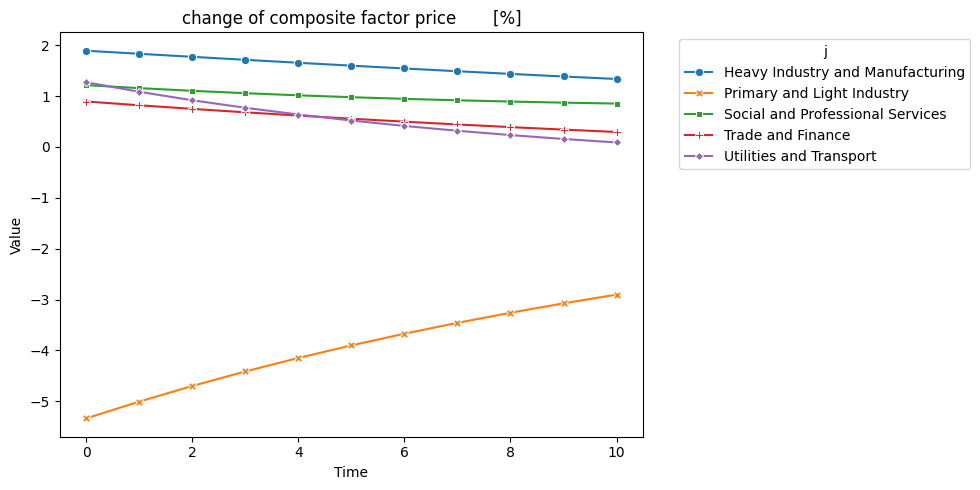

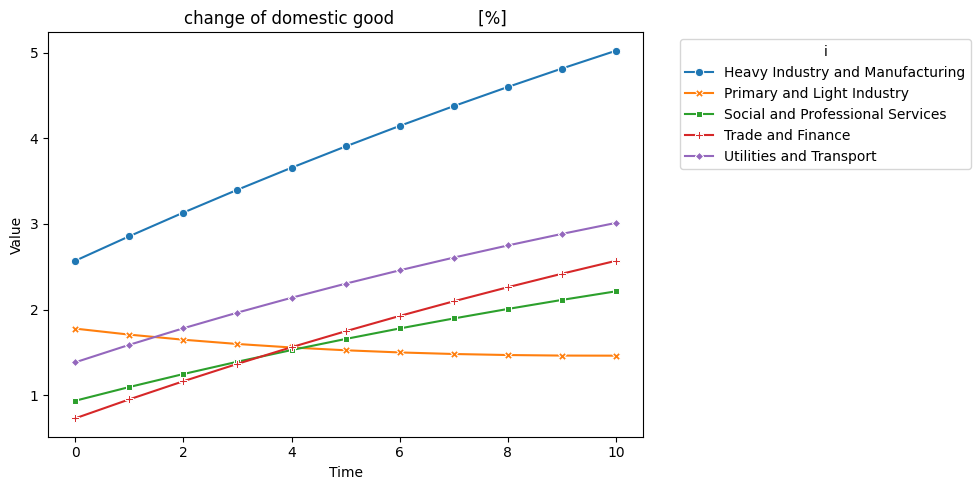

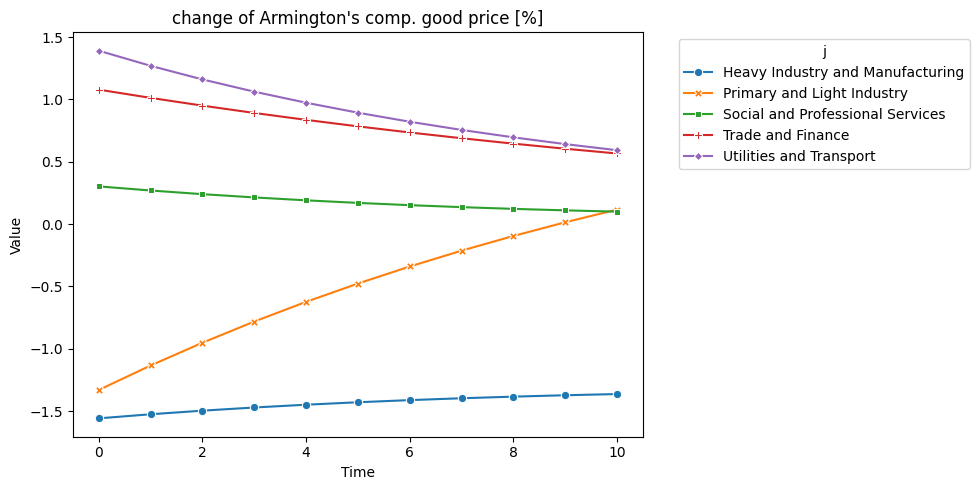

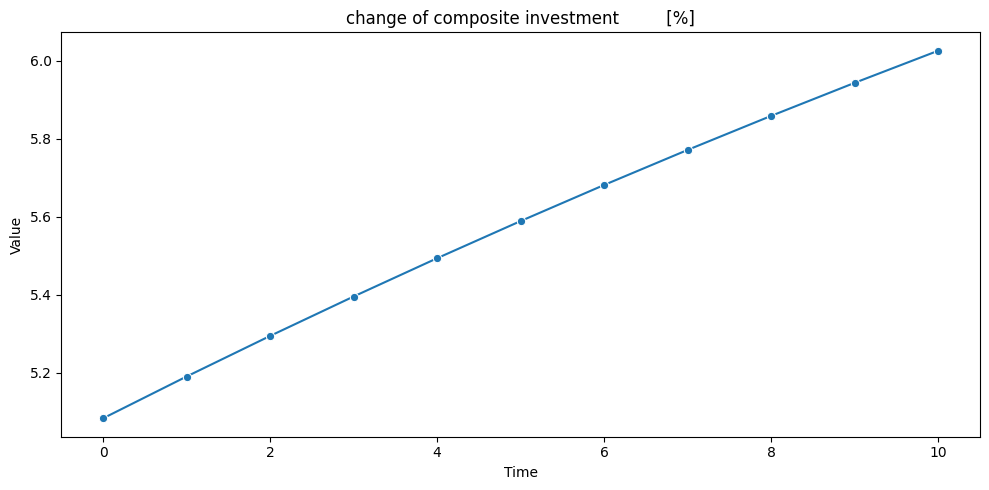

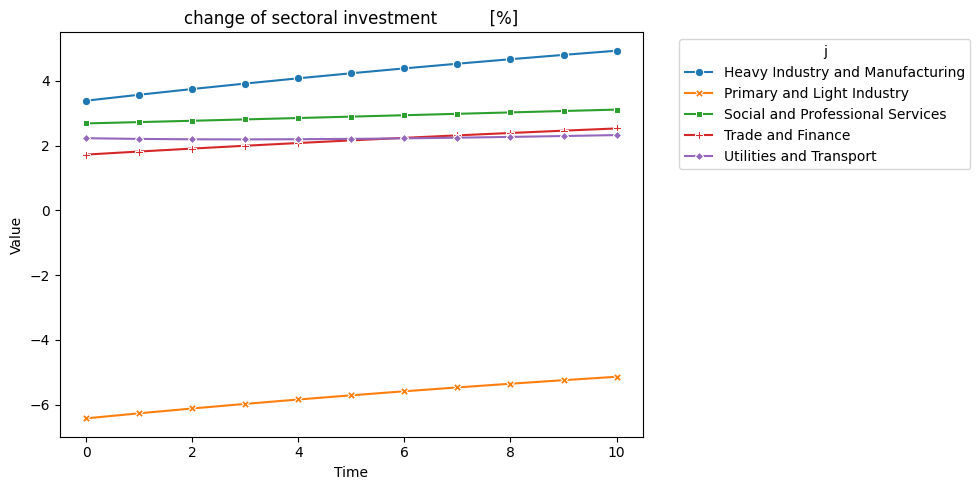

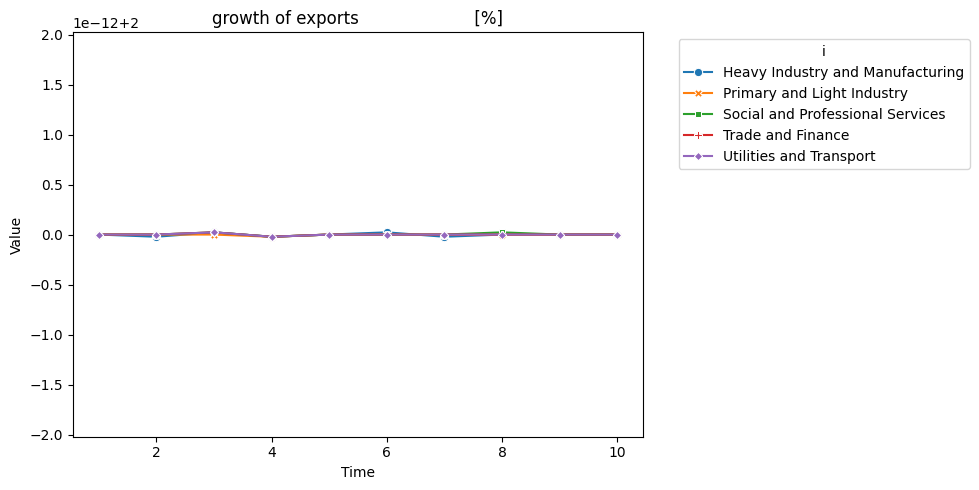

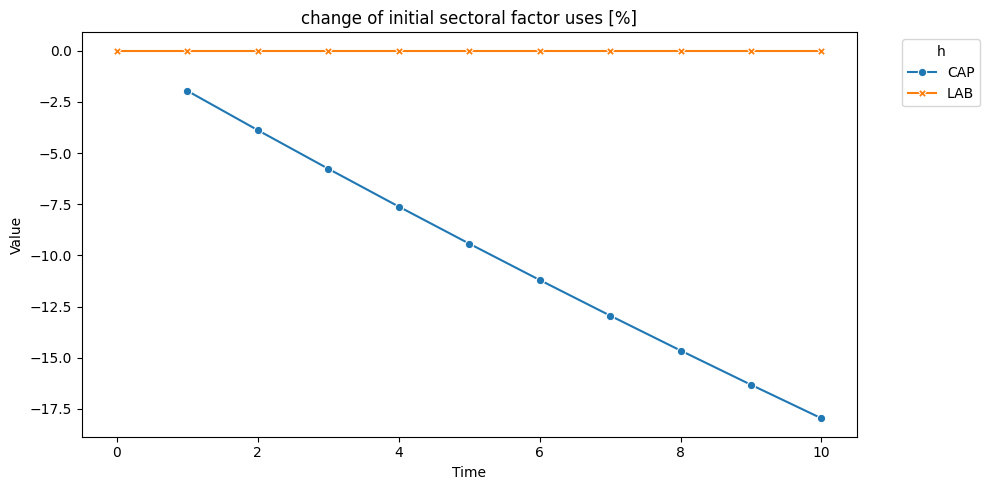

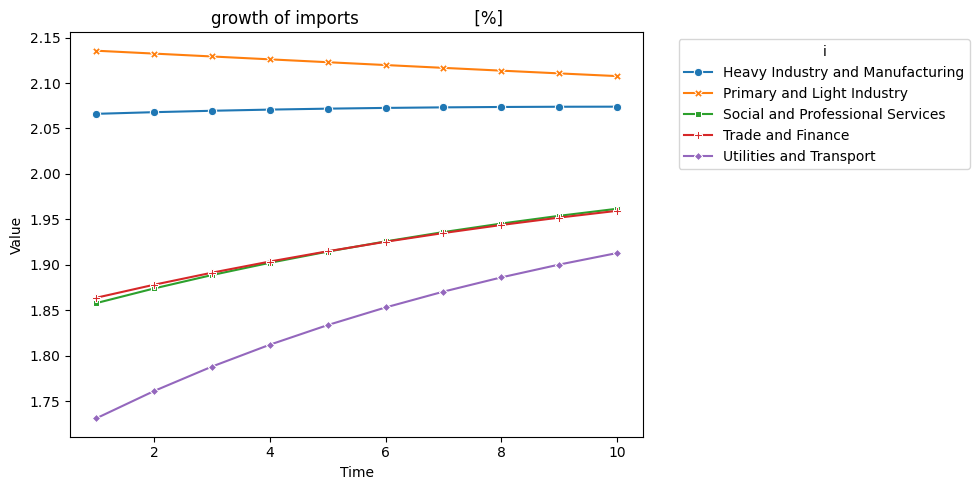

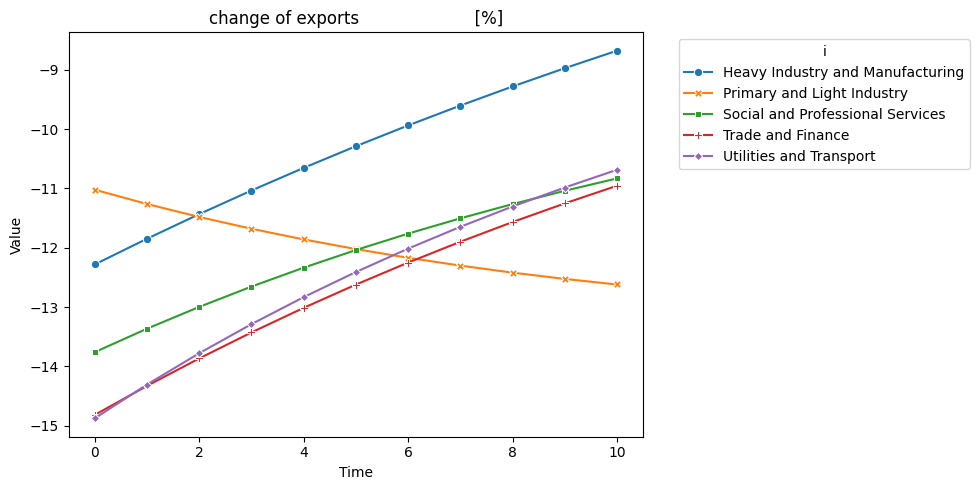

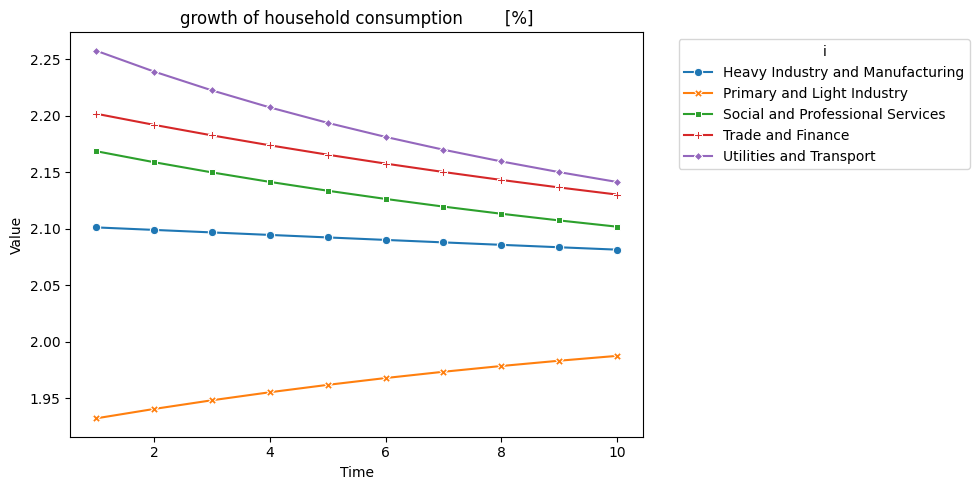

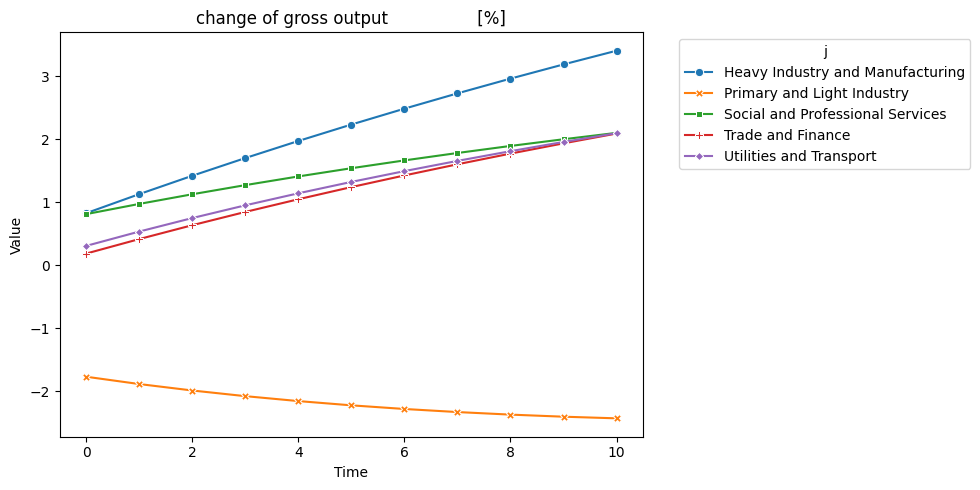

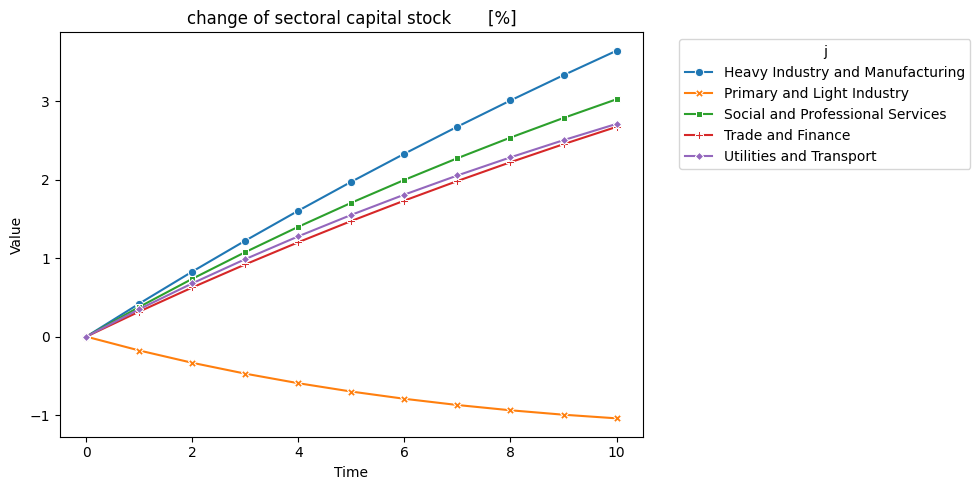

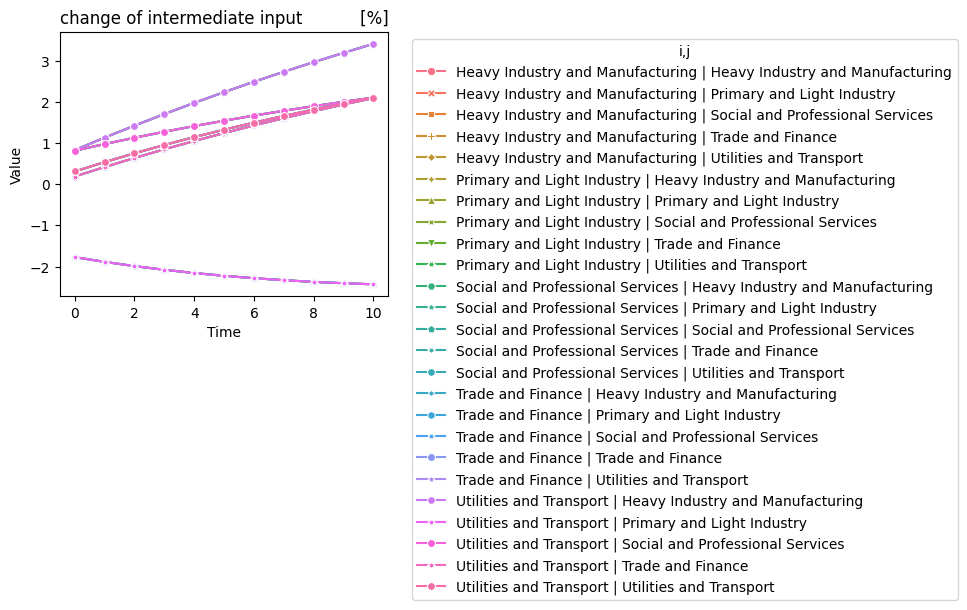

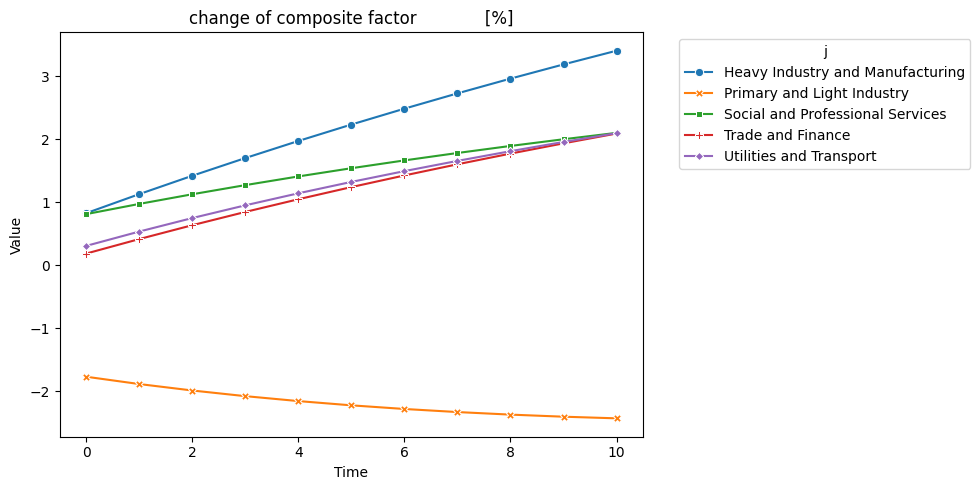

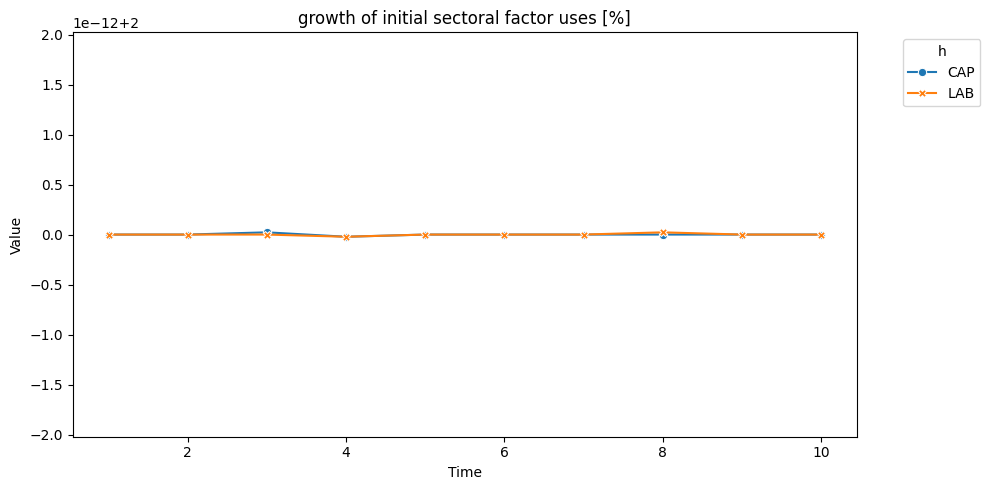

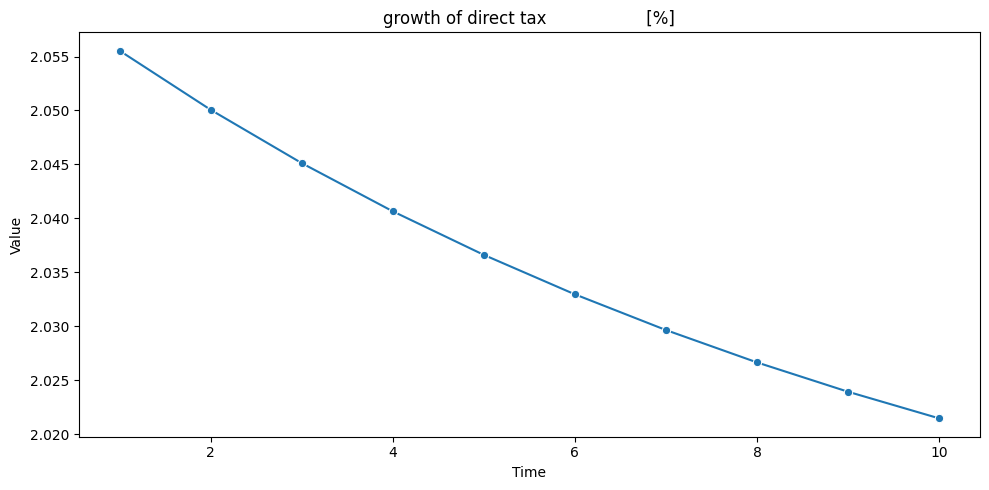

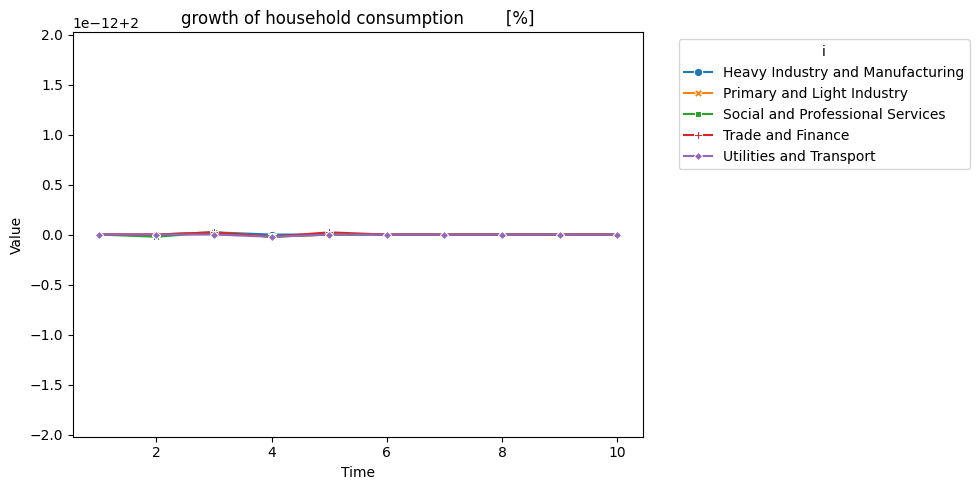

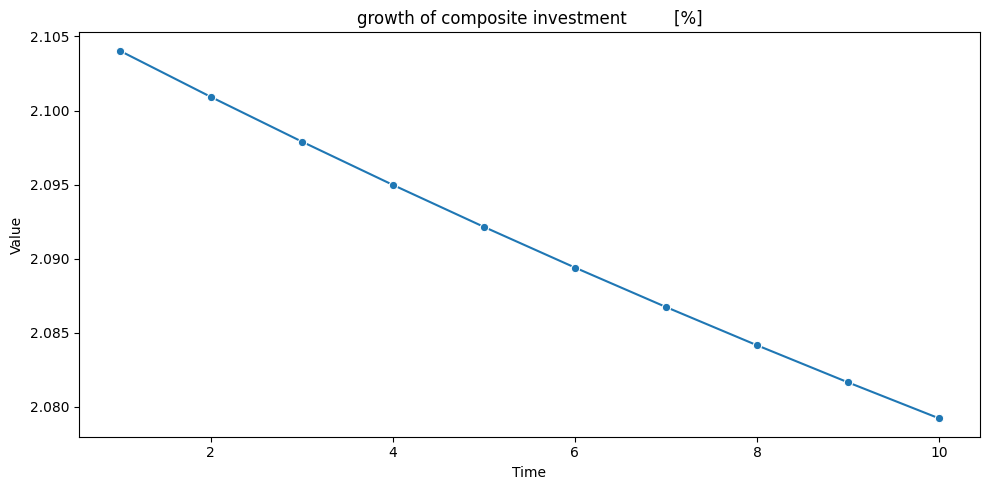

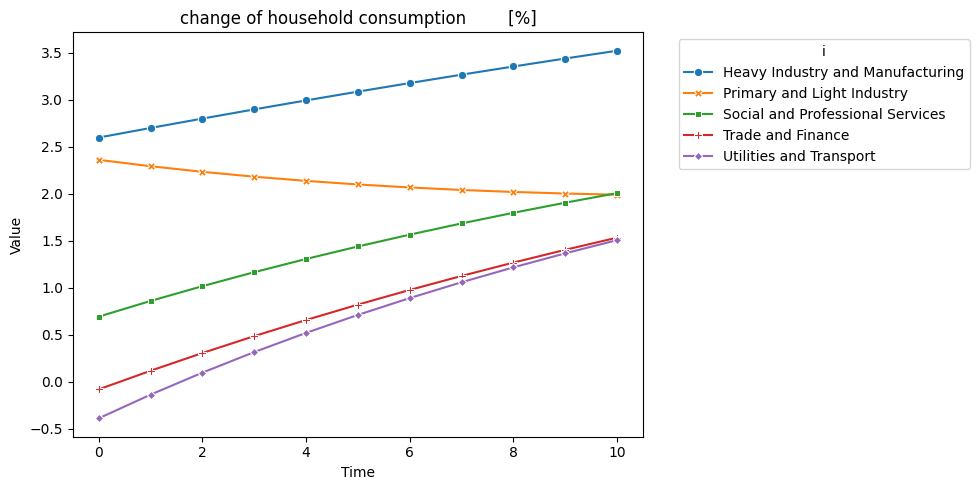

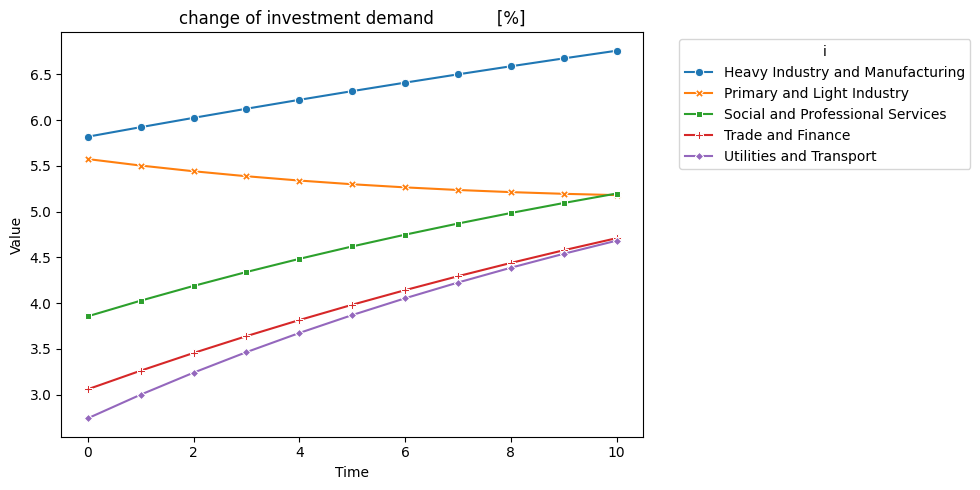

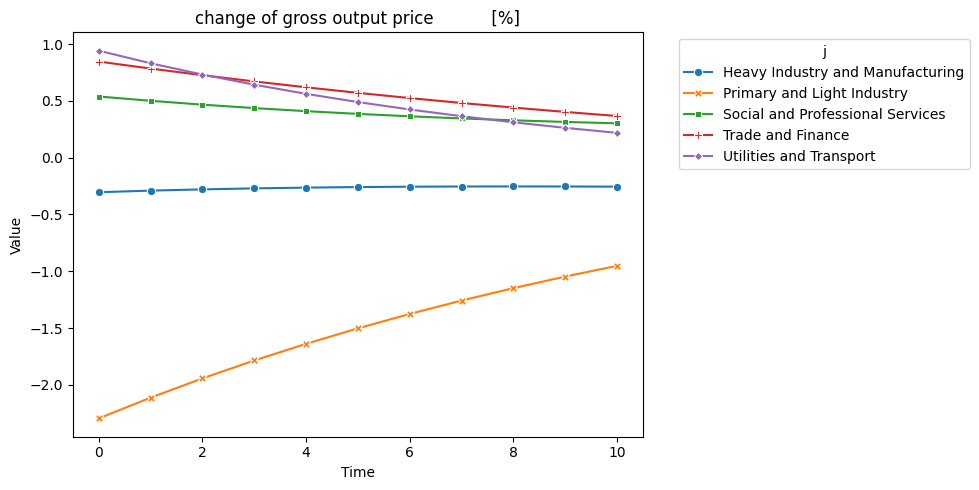

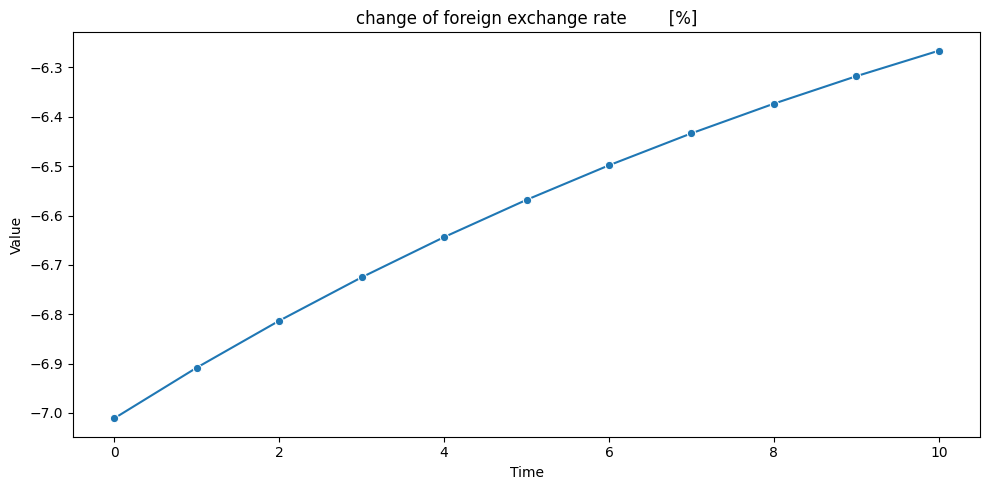

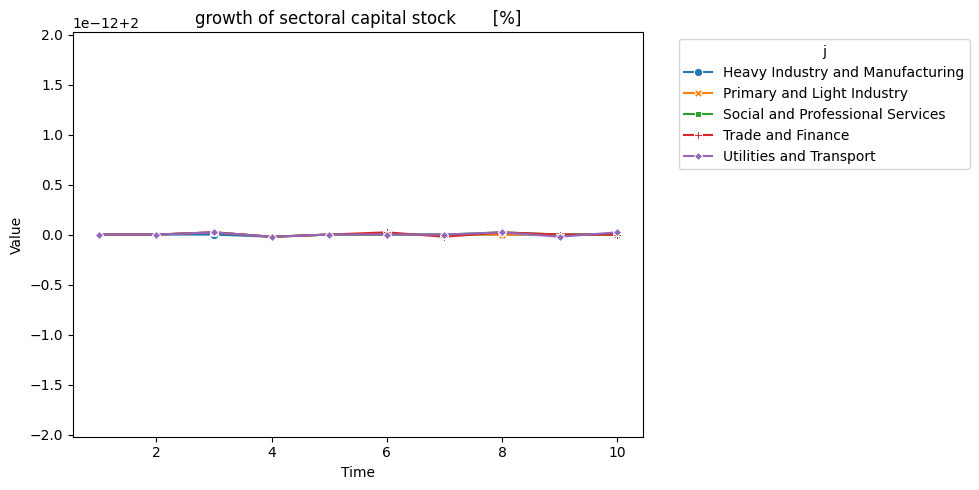

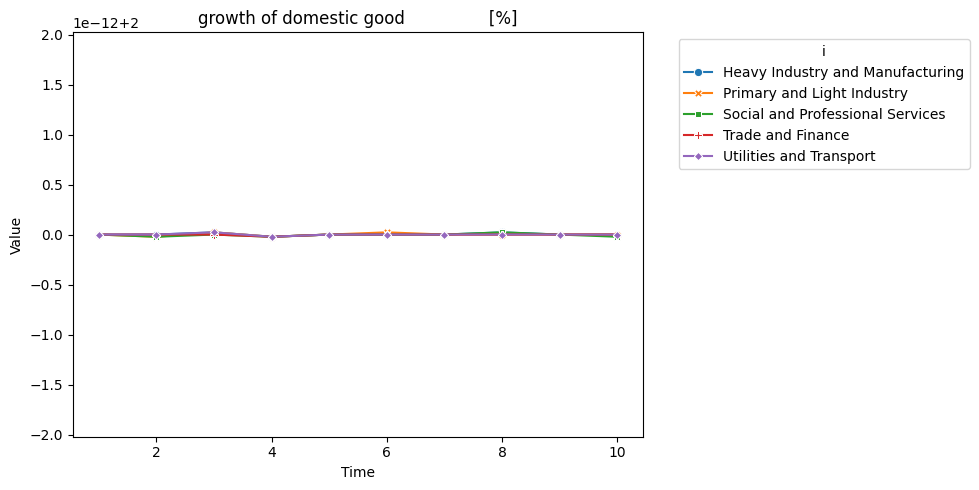

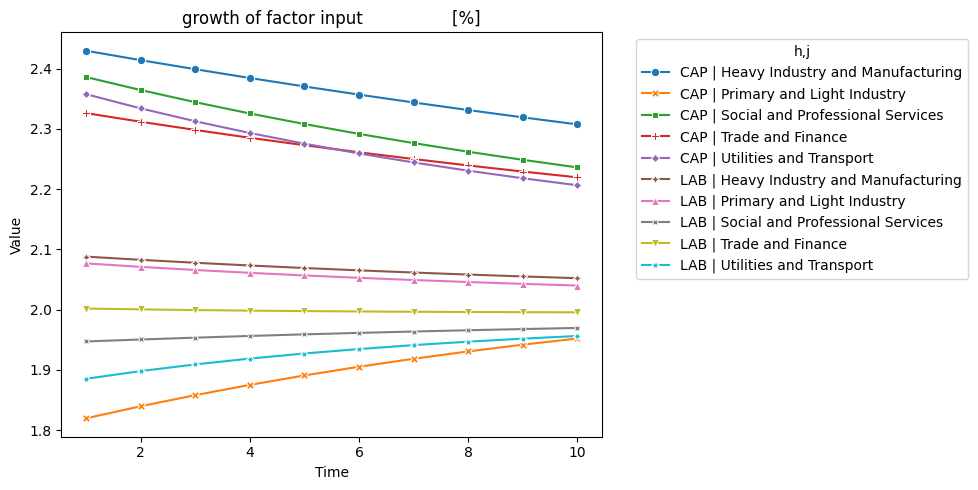

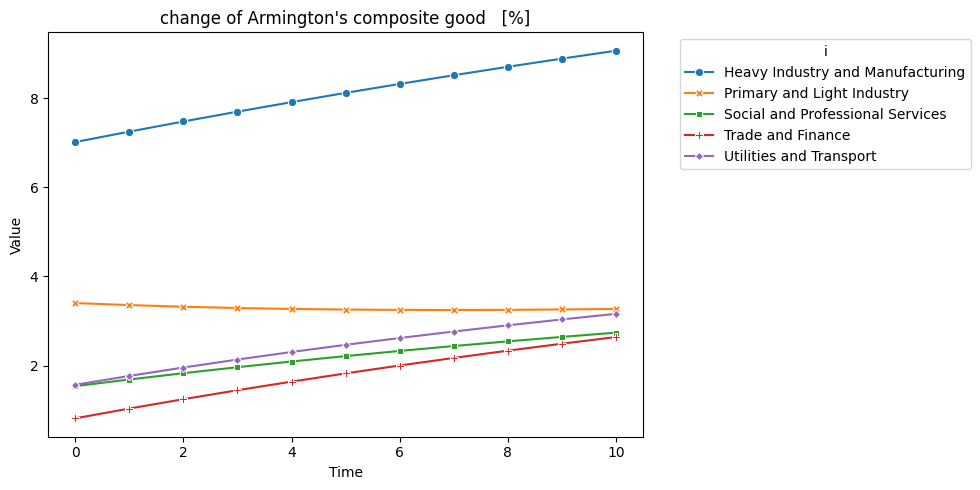

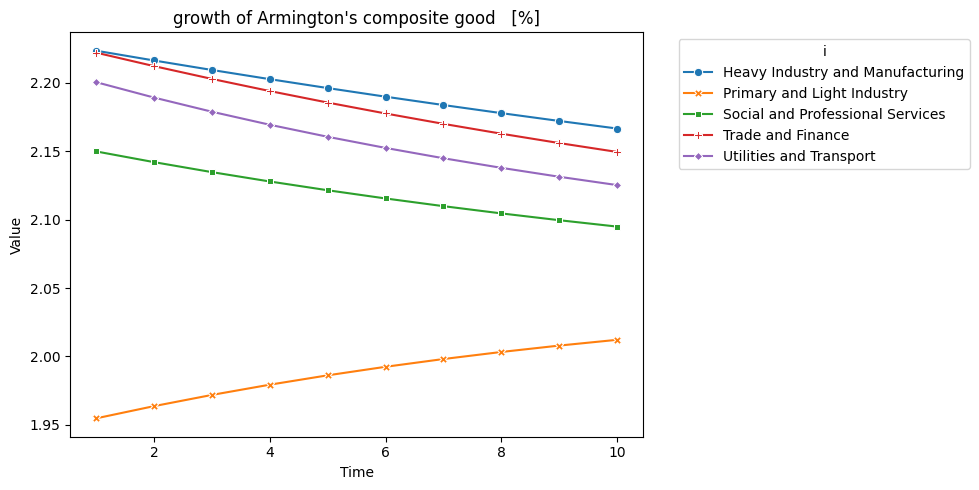

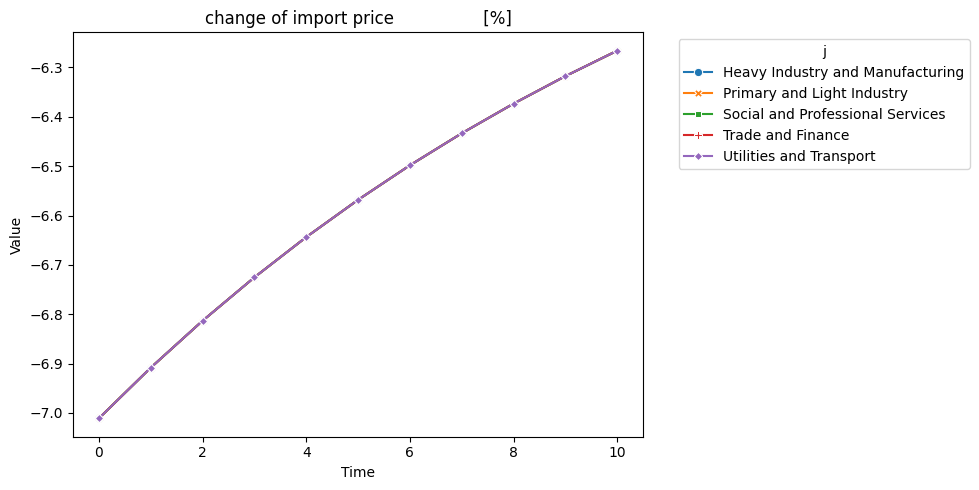

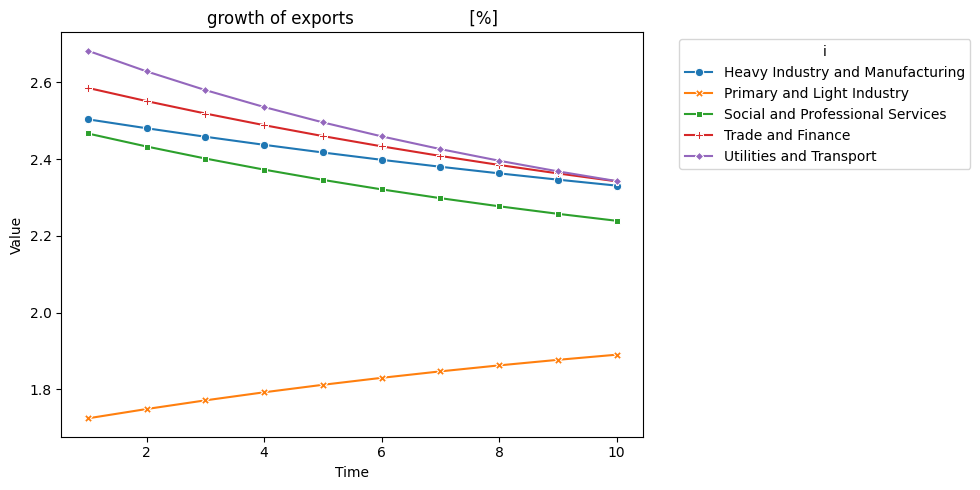

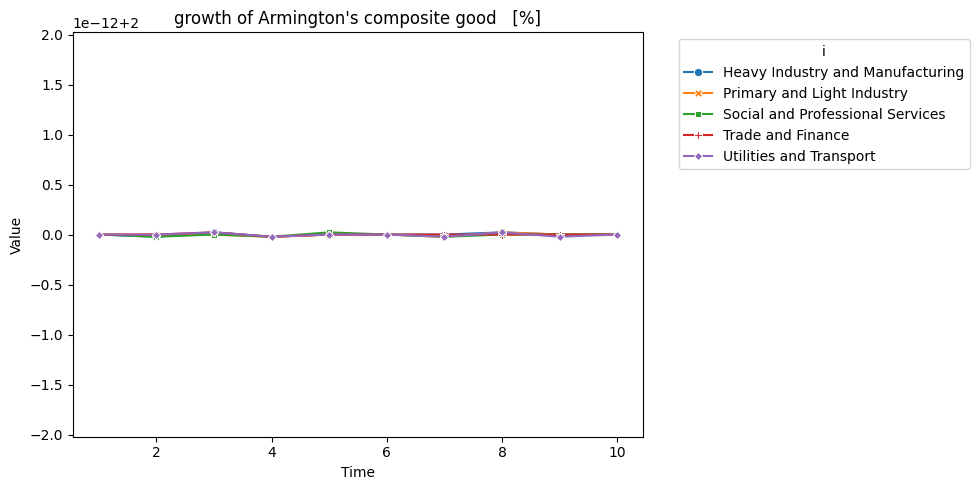

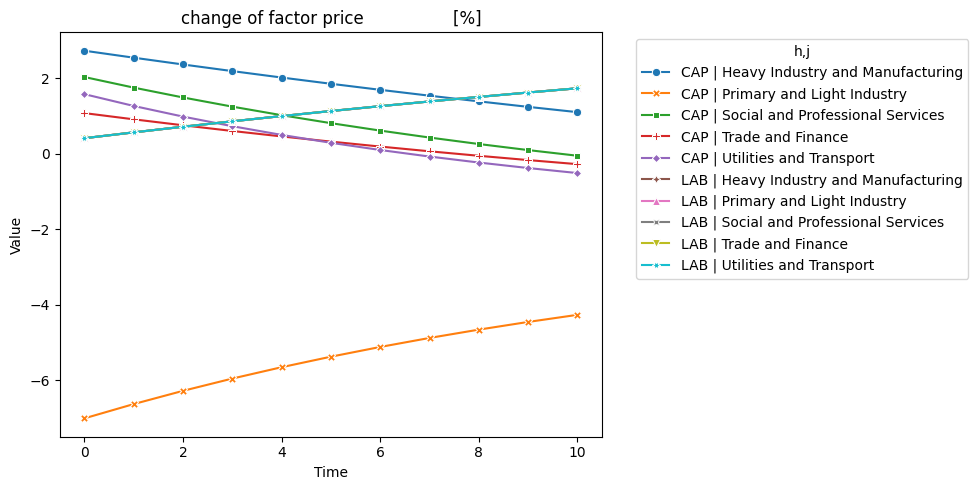

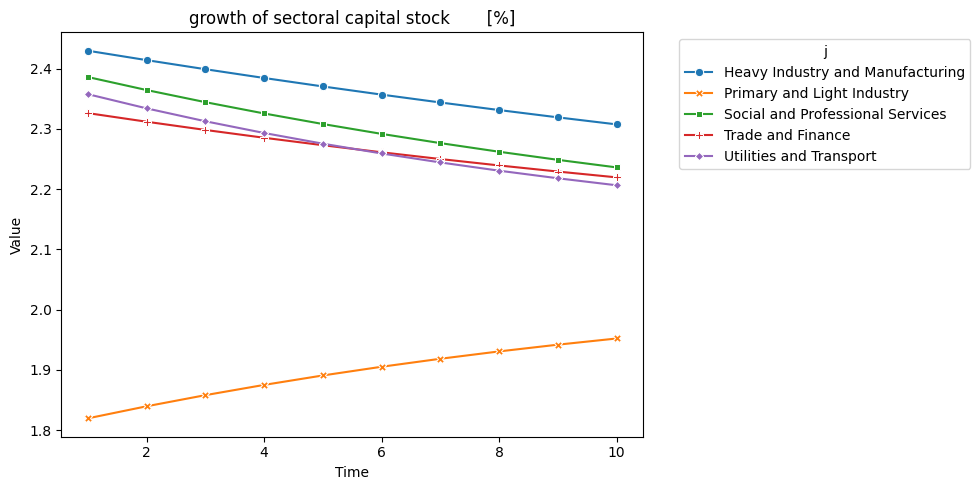

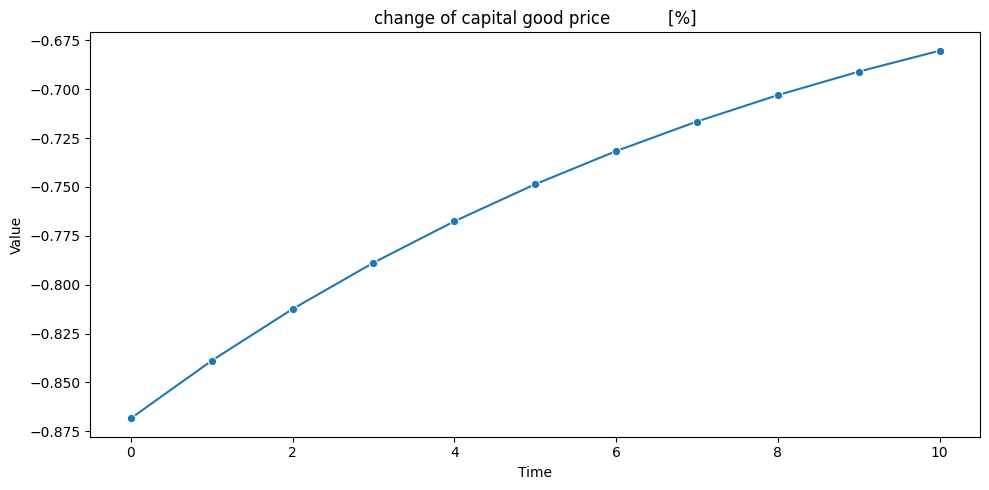

In [10]:
current_path = os.getcwd()
results_dir = os.path.join(current_path, "cge_gamspy_project", "data", "cge_results")
chart_dir = os.path.join(current_path, "cge_gamspy_project", "data", "cge_charts_seaborn")
os.makedirs(chart_dir, exist_ok=True)

# Loading descriptions.csv
desc_dict = {}
desc_path = os.path.join(results_dir, "descriptions.csv")
if os.path.exists(desc_path):
    desc_df = pandas.read_csv(desc_path)
    desc_dict = dict(zip(desc_df["name"], desc_df["description"]))

# Loading all parameters
csv_files = [f for f in os.listdir(results_dir) if f.endswith(".csv") and f != "descriptions.csv"]

for filename in csv_files:
    name = filename.replace(".csv", "")
    df = pandas.read_csv(os.path.join(results_dir, filename))

    try:
        title = desc_dict.get(name, name)
        plt.figure(figsize=(10, 5))

        # 1. Only t and value - simple line
        if set(df.columns) == {"t", "value"}:
            sns.lineplot(data=df, x="t", y="value", marker='o')
            plt.title(title)
            plt.ylabel("Value")

        # 2. One additional index (eg i or j or h)
        elif "t" in df.columns and "value" in df.columns and len(df.columns) == 3:
            dim = [col for col in df.columns if col not in {"t", "value"}][0]
            sns.lineplot(data=df, x="t", y="value", hue=dim, style=dim, markers=True, dashes=False)
            plt.title(title)
            plt.ylabel("Value")
            plt.legend(title=dim, bbox_to_anchor=(1.05, 1), loc="upper left")

        # 3. Two additional indices (e.g. h, j, t)
        elif "t" in df.columns and "value" in df.columns and len(df.columns) == 4:
            dims = [col for col in df.columns if col not in {"t", "value"}]
            df["group"] = df[dims[0]].astype(str) + " | " + df[dims[1]].astype(str)
            sns.lineplot(data=df, x="t", y="value", hue="group", style="group", markers=True, dashes=False)
            plt.title(title)
            plt.ylabel("Value")
            plt.legend(title=",".join(dims), bbox_to_anchor=(1.05, 1), loc="upper left")

        plt.xlabel("Time")
        plt.tight_layout()
        # plt.savefig(os.path.join(chart_dir, f"{name}_seaborn.png"))
        # plt.close()

    except Exception as e:
        print(f"⚠️ Ошибка при построении графика для {name}: {e}")